In [ ]:
!pip install tensorflow

In [ ]:
#load the libraries
import tensorflow as tf

#load the data
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [ ]:
print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


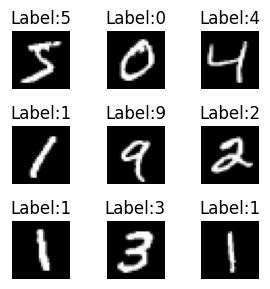

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#function to plot a grid of images
def plot_mnist_images(images,labels,num_images=9):
  #determine the grid size(ex: 3x3 for 9 images)
  grid_size=int(np.sqrt(num_images))

  #create a figure with subplots
  plt.figure(figsize=(3,3))

  for i in range(num_images):
    plt.subplot(grid_size,grid_size,i+1) # subplot index
    plt.imshow(images[i],cmap='gray')#display image in grayscale
    plt.title(f'Label:{labels[i]}') #dipslay the label
    plt.axis('off') #hide axes

  plt.tight_layout() #adjust subplots to fit into figure area
  plt.show()

#plot 9 images from the training set
plot_mnist_images(X_train,y_train,num_images=9)

In [ ]:
#checking the couting based on the each labels (based on y train set)
classes,counts=np.unique(y_train,return_counts=True)
for i in range(10):
  print(f"label{classes[i]}:{classes[i]}={counts[i]}")

label0:0=5923
label1:1=6742
label2:2=5958
label3:3=6131
label4:4=5842
label5:5=5421
label6:6=5918
label7:7=6265
label8:8=5851
label9:9=5949


In [ ]:
#checking the couting based on the each labels (based on y test set)
classes,counts=np.unique(y_test,return_counts=True)
for i in range(10):
  print(f"label{classes[i]}:{classes[i]}={counts[i]}")

label0:0=980
label1:1=1135
label2:2=1032
label3:3=1010
label4:4=982
label5:5=892
label6:6=958
label7:7=1028
label8:8=974
label9:9=1009


In [ ]:
#building the model
# we need to convert the 2D into 1D we do this specially when we do DL, for this we need to use reshape
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.utils import to_categorical

X_train=X_train.reshape(60000,784) #28*28=784
X_test=X_test.reshape(10000,784)
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
#Normalization
X_train/=255
X_test/=255

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#converting y_test and y_train to one hot encoding
# one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
from keras.models import Sequential
from keras import initializers #to balnce the weights
from keras.regularizers import l1,l2 # to minimize the overfitting using three types of regression : lasso (l2), ridge(l1), and drop off(removes some connections in hidden layers temporarily)
from keras.layers import Input
model=Sequential()
model.add(Input(shape=(X_train.shape[1],))) #or we coudl use model.add(Input(shape=(784,))) # input dimensions would be the images and it would be the 1D features we got (cz the DL model only uses 1D features)
model.add(Dense(150,activation='relu',kernel_initializer='he_normal',kernel_regularizer=l2(0.01)))
model.add(Dense(150,activation="relu"))
#model.add(Dense(50,activation='relu'))  #for each hidden layer we need to have an actovation layer, we can increase the no.of neurons(100)as with increase the perfomance could eb increased
model.add(Dense(10, activation="softmax"))

In [ ]:
#compiling the sequential model
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

In [ ]:
#training the model
history =model.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8566 - loss: 1.0959 - val_accuracy: 0.9307 - val_loss: 0.3651
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9376 - loss: 0.3418 - val_accuracy: 0.9517 - val_loss: 0.2844
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9486 - loss: 0.2918 - val_accuracy: 0.9605 - val_loss: 0.2524
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9534 - loss: 0.2722 - val_accuracy: 0.9600 - val_loss: 0.2464
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9567 - loss: 0.2515 - val_accuracy: 0.9638 - val_loss: 0.2326
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9592 - loss: 0.2390 - val_accuracy: 0.9542 - val_loss: 0.2634
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9610 - loss: 0.2282 - val_accuracy: 0.9525 - val_loss: 0.2487
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9604 - loss: 0.227

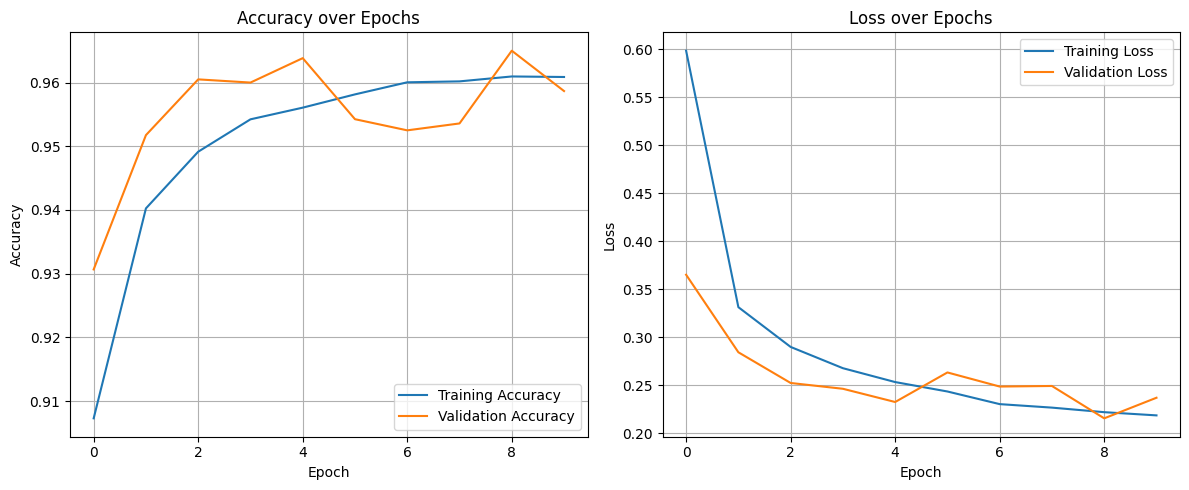

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.5 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

def build_model(hp):
  model=keras.Sequential()
  model.add(keras.layers.Dense(
      units=hp.Int('units_1',min_value=15,max_value=300,step=25),
      activation=hp.Choice('activation_1',values=["relu","tanh"]),
      input_shape=(X_train.shape[1],)
  ))

  model.add(keras.layers.Dense(
      units=hp.Int('units_2',min_value=15,max_value=300,step=25),
      activation=hp.Choice('activation_2',values=['relu','tanh'])
  ))

  model.add(keras.layers.Dense(10,activation='softmax'))

  model.compile(optimizer=hp.Choice('Optimizer',['adam','sgd','RMSprop']),
                loss='categorical_crossentropy',
                metrics=['accuracy']
                )
  return model

tuner=RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=5,
    directory="my_dir",
    project_name='hp tuning'
)

tuner.search(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

Trial 10 Complete [00h 06m 51s]
val_accuracy: 0.9789799928665162

Best val_accuracy So Far: 0.9823999881744385
Total elapsed time: 01h 21m 50s


In [ ]:
#getting the best hps
best_model=tuner.get_best_models(num_models=1)[0]
best_hp=tuner.get_best_hyperparameters(num_trials=1)[0]
print('best hyperparameters:')
print(best_hp.values)

In [ ]:
#tuned model
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout
from keras.callbacks import EarlyStopping #dense layer is called fully ocnnected layer and its based on linear equation
from keras import initializers #to balnce the weights
from keras.regularizers import l1,l2 # to minimize the overfitting using three types of regression : lasso (l2), ridge(l1), and drop off(removes some connections in hidden layers temporarily)
model_hp=Sequential()
model_hp.add(Input(shape=(X_train.shape[1],)))
model_hp.add(Dense(45,activation='tanh',kernel_regularizer=l2(0.02)))
model_hp.add(Dense(225,activation="tanh"))
#model_hp.add(Dense(125,activation='relu')) #for each hidden layer we need to have an actovation layer, we can increase the no.of neurons(100)as with increase the perfomance could eb increased
model_hp.add(Dense(10,activation="softmax"))
model_hp.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")
history_hp = model_hp.fit(X_train,y_train,epochs=30,batch_size=32,validation_data=(X_test,y_test))

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_hp.history['accuracy'], label='Training Accuracy')
plt.plot(history_hp.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history_hp.history['loss'], label='Training Loss')
plt.plot(history_hp.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#classification report
import numpy as np
predict_x=model.predict(X_test)
predict1=np.argmax(predict_x,axis=1)
print(predict1)

# Convert one-hot y_test to class labels
true_labels = np.argmax(y_test, axis=1)

# Import and print classification report
from sklearn.metrics import classification_report
print(classification_report(true_labels, predict1))